<a href="https://colab.research.google.com/github/msmoleres/ELEC-380/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
npzfile = np.load('drive/My Drive/Colab/150313_spikes_valvetimes_prex.npz', allow_pickle=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# npzfile.files will print out contents!
spike_times = npzfile['spike_times'] # 68-neuron dimensional array, each array entry is vector of timestamps for each spike from that neuron
# The olfactometer is coded for 16 different odors (actually some are the same chemical at different concentrations)
odor_valve_times = npzfile['odor_valve_times'] # 16-odor dimensional array, each entry is a vector of ~10 timestamps of repeated trials when that odor was released
inhalation_times = npzfile['prex'] # All detected inhalation timestamps for the whole experiment
odor_inhalation_times = npzfile['odor_prex_times'] # 16-odor x ~10 repititons - timestamps of the first inhalation following odor release for a given trial


In [155]:
def plot_ticks(t, y_base, ax=None, height=0.8, **kwargs):
  """
  plot_ticks plots vertical lines (tick marks) at multiple x-axis locations.

  :t vector of x-axis times for a tick mark
  :y_base each tick mark starts at this y-axis location
  :height each tick mark starts at y_base and is height tall (default 0.8)
  :ax use this pyplot figure axes to plot into (if None, use the current axes)
  """
  if not ax: # cover the situation where no axes are specified
    ax = plt.gca()
  ax.vlines(t, y_base, y_base+height, **kwargs)

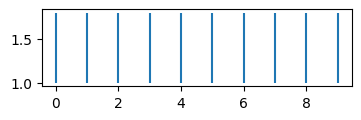

In [156]:
# Try out our function
fig, ax = plt.subplots(1,1, figsize=(4,1))
plot_ticks(np.arange(10), 1)

In [157]:
def find_nearby_spikes(ts, t0, window=(-0.5, 1)):
  return ts[(ts > t0 + window[0]) & (ts <= t0 + window[1])] - t0

Text(0, 0.5, 'Trial')

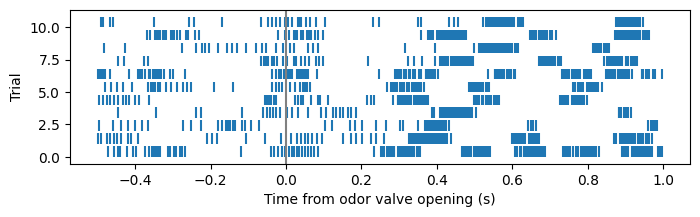

In [158]:
odor = 12
neuron = 24

fig, ax = plt.subplots(1, 1, figsize=(8,2))
for trial, ovt in enumerate(odor_valve_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  plot_ticks(relative_spikes, trial, ax=ax) # we'll use the trial number as our y-location, so the first trial is at the bottom

ax.axvline(0, color='gray')
ax.set_xlabel('Time from odor valve opening (s)')
ax.set_ylabel('Trial')

Text(0, 0.5, 'Spikes per bin')

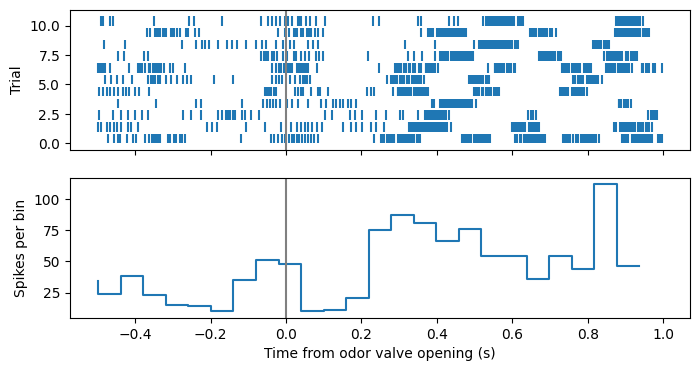

In [159]:
odor = 12
neuron = 24

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes = [] # we'll use this to accumuluate

for trial, ovt in enumerate(odor_valve_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  all_relative_spikes.append(relative_spikes)
  plot_ticks(relative_spikes, trial, ax=ax[0]) # we'll use the trial number as our y-location, so the first trial is at the bottom
ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes = np.hstack(all_relative_spikes) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes,25) # calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from odor valve opening (s)')
ax[1].set_ylabel('Spikes per bin')

Text(0, 0.5, 'Spikes per bin')

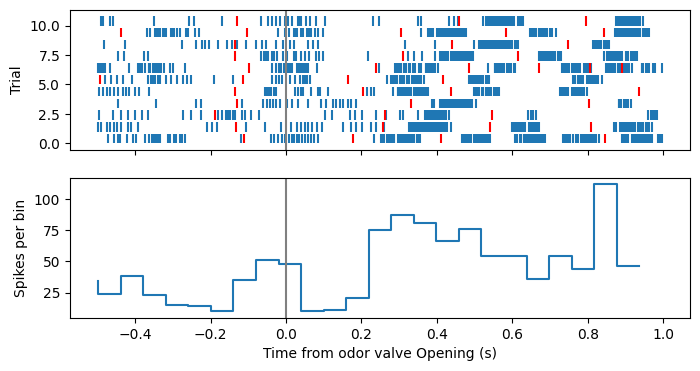

In [160]:
odor = 12
neuron = 24

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes = [] # we'll use this to accumuluate

for trial, ovt in enumerate(odor_valve_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  all_relative_spikes.append(relative_spikes)
  plot_ticks(relative_spikes, trial, ax=ax[0]) # we'll use the trial number as our y-location, so the first trial is at the bottom

  relative_breaths = find_nearby_spikes(inhalation_times, ovt) # find inhalation times that happen within our trial window
  plot_ticks(relative_breaths, trial, ax=ax[0], colors='r')

ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes = np.hstack(all_relative_spikes) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes,25) # calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from odor valve Opening (s)')
ax[1].set_ylabel('Spikes per bin')

Text(0, 0.5, 'Spikes per bin')

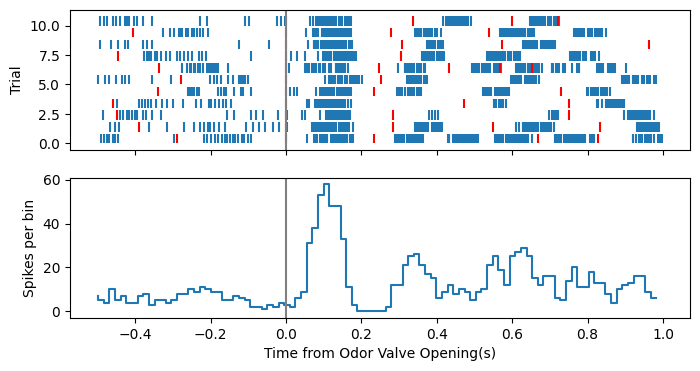

In [169]:
###Problem #1 Code###
odor = 12
neuron = 24

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes = [] # we'll use this to accumuluate

for trial, ovt in enumerate(odor_inhalation_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  all_relative_spikes.append(relative_spikes)
  plot_ticks(relative_spikes, trial, ax=ax[0]) # we'll use the trial number as our y-location, so the first trial is at the bottom

  relative_breaths = find_nearby_spikes(inhalation_times, ovt) # find inhalation times that happen within our trial window
  plot_ticks(relative_breaths, trial, ax=ax[0], colors='r')

ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes = np.hstack(all_relative_spikes) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes,100) # calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from Odor Valve Opening(s)')
ax[1].set_ylabel('Spikes per bin')

Problem #1: The time marker of .1s gives us a temporally precise measure of neural activity.

Text(0, 0.5, 'Spikes per bin')

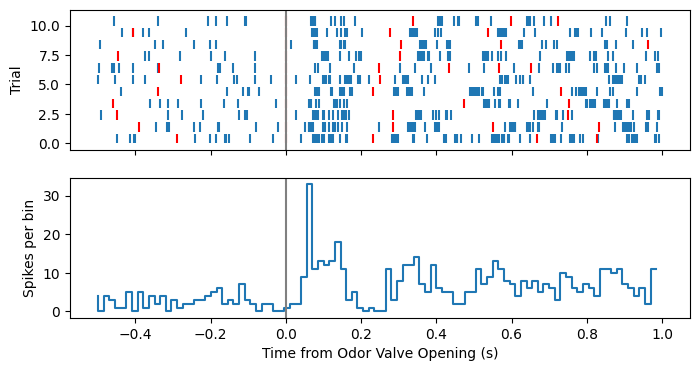

In [162]:
###Problem #2 Code###
odor = 12
neuron = 29


fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes = [] # we'll use this to accumuluate

for trial, ovt in enumerate(odor_inhalation_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  all_relative_spikes.append(relative_spikes)
  plot_ticks(relative_spikes, trial, ax=ax[0]) # we'll use the trial number as our y-location, so the first trial is at the bottom

  relative_breaths = find_nearby_spikes(inhalation_times, ovt) # find inhalation times that happen within our trial window
  plot_ticks(relative_breaths, trial, ax=ax[0], colors='r')

ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes = np.hstack(all_relative_spikes) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes, 100)# calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from Odor Valve Opening (s)')
ax[1].set_ylabel('Spikes per bin')

Problem #2: A larger bin size would lose out on the finer details that a smaller bin size would allow us to see. A smaller bin size would not allow use to see the spikes of multiple inhalations. A bin size of 100 allows us to see the spikes in the neurons response to to the odor. A bin size of up to 200 allows us to see a nice looking graph but still keeps the spikes managable to where they do not appear molded into each other. The minimum bin size I would go is 100 because I can still generally see what time the spikes occured at. For Neuron 29 I think that 200 bin size is a good maximum and 50-100 is a good minimum to see all spikes and their timings.

Text(0, 0.5, 'Spikes per bin')

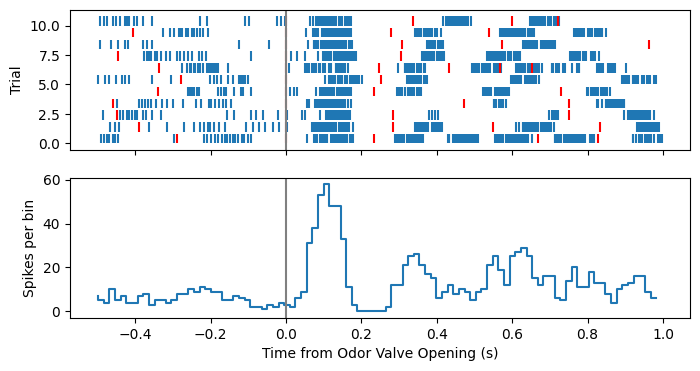

In [180]:
###Problem #3 Code ###
odor = 12
neuron = 24

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes = [] # we'll use this to accumuluate

for trial, ovt in enumerate(odor_inhalation_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes = find_nearby_spikes(spike_times[neuron], ovt)
  all_relative_spikes.append(relative_spikes)
  plot_ticks(relative_spikes, trial, ax=ax[0]) # we'll use the trial number as our y-location, so the first trial is at the bottom

  relative_breaths = find_nearby_spikes(inhalation_times, ovt) # find inhalation times that happen within our trial window
  plot_ticks(relative_breaths, trial, ax=ax[0], colors='r')

ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes = np.hstack(all_relative_spikes) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes,100) # calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from Odor Valve Opening (s)')
ax[1].set_ylabel('Spikes per bin')

Problem #3: In terms of response latency, from fast to slow, 55, 19, 17 = 24, 12. The longest reponse letency was neuron 12 with having a more delayed inhalation times compared to the others. The sniffing cycle after the initial odor detection inhalation increases at a rapid rate similarily between all of the neurons. There are more inhalation markers per time frame compared to before the smell was detected.

Text(0, 0.5, 'Spikes per bin')

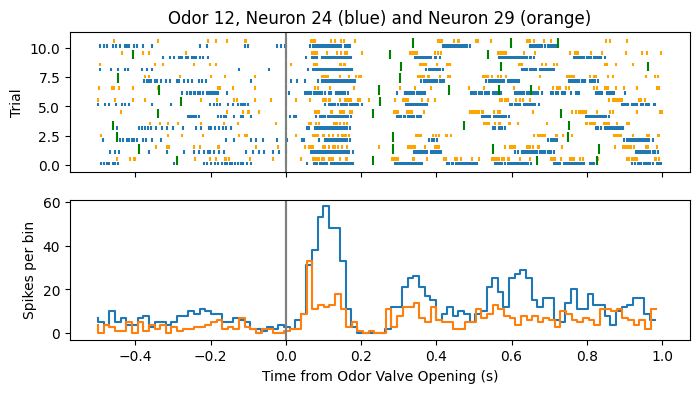

In [179]:
### Problem #4 ###
odor = 12
neuron1 = 24
neuron2 = 29


fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True) # note that now ax is a vector of size 2

all_relative_spikes1 = [] # we'll use this to accumuluate
all_relative_spikes2 = []

for trial, ovt in enumerate(odor_inhalation_times[odor]): # "enumerate" takes a list and returns (index, item) for each item in the list
  relative_spikes1 = find_nearby_spikes(spike_times[neuron1], ovt)
  relative_spikes2 = find_nearby_spikes(spike_times[neuron2], ovt)
  all_relative_spikes1.append(relative_spikes1)
  all_relative_spikes2.append(relative_spikes2)
  plot_ticks(relative_spikes1, trial, height = 0.3, ax=ax[0])
  plot_ticks(relative_spikes2, trial+0.4, height = 0.3, ax=ax[0], color = 'orange') #switch color to orange for viewing purposes.

  relative_breaths = find_nearby_spikes(inhalation_times, ovt) # find inhalation times that happen within our trial window
  plot_ticks(relative_breaths, trial, ax=ax[0], colors='green')

ax[0].set_title('Odor 12, Neuron 24 (blue) and Neuron 29 (orange)', size = 12)
ax[0].axvline(0, color='gray')
ax[0].set_ylabel('Trial')

all_relative_spikes1 = np.hstack(all_relative_spikes1) # convert a list of numpy arrays by stacking them end to end
hist, edges = np.histogram(all_relative_spikes1,100) # calculate a histogram of our spiking data
ax[1].step(edges[:-1], hist) # plot it on the second axis, using the left end of the bin as the edges of steps
ax[1].axvline(0, color='gray')

all_relative_spikes2 = np.hstack(all_relative_spikes2)
hist, edges = np.histogram(all_relative_spikes2,100)
ax[1].step(edges[:-1], hist)
ax[1].axvline(0, color='gray')


ax[1].set_xlabel('Time from Odor Valve Opening (s)')
ax[1].set_ylabel('Spikes per bin')


Problem #4: The orange neuron (29) is activated first on the second sniff, the blue neuron (24) is firing a little later on the second sniff. After the first sniff the activating of the two neurons are close to one another. The orange neuron has seems to have the initial lower latency when responding to odor. The relative latency is more reliable for the second sniff after the odor has already been inhaled and detected.   